# Análisis Exploratorio de Datos

In [1]:
import pandas as pd
import datetime as dt
import time as t
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cg = CoinGeckoAPI()
cg.ping()

{'gecko_says': '(V3) To the Moon!'}

### Diferente información sobre las Monedas
El siguiente dataframe lista las monedas ordenadas por capitalización de mercado y muestan caracteristicas de ellas, algunas son explicadas aqui abajo. Para mas informacion referirse al glosario de coingecko mediante el siguente link [aqui](https://www.coingecko.com/en/glossary)



Transcripcion de pagina de coigecko, glosario.

**market_cap**: In Crypto, market cap is measured by multiplication of the circulating supply of tokens or currency and its current price
**fully_diluted_valuation**: Fully Diluted Valuation (FDV) is the market capitalization if the max supply of a coin is in circulation. The common mathematical formula used to calculate FDV is Current Price x Max Supply. Note that it can take 3, 5, 10 or more years before the FDV can be reached, depending on how the emission schedule is designed.

**total_volume** : The amount of the cryptocurrency that has been traded in the last 24 hours.

**circulating_supply**: An approximation of the number of coins or tokens that are currently not locked and available for public transactions.

**ath**:_ Precio de cripto desde el máximo histórico (ATH)

**atl**: The lowest point (in price, in market capitalization) that a cryptocurrency has been in history.

**roi**: Short for “Return on Investment”, the ratio between the net profit and cost of investing.
An approximation of the number of coins or tokens that are currently not locked and available for public transactions.


In [3]:
coin_markets = cg.get_coins_markets(vs_currency='usd', per_page=250)
coin_markets = pd.DataFrame(coin_markets)
tot_market_cap = coin_markets['market_cap'].sum()
coin_markets.insert(loc=6, column='percentage_of_total', value=2)
coin_markets['percentage_of_total'] = coin_markets['market_cap']/tot_market_cap*100
coin_markets.insert(loc=7, column='cumsum_Percentage_MC', value=coin_markets['percentage_of_total'].cumsum())
#coin_markets = coin_markets.iloc[0:10,:] 


In [6]:
coin_markets.head(10)

,id,symbol,name,image,current_price,market_cap,percentage_of_total,cumsum_Percentage_MC,market_cap_rank,fully_diluted_valuation,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,60183.000000,1187780928127,51.981148,51.981148,1,1.264918e+12,...,2.100000e+07,2.100000e+07,73738.000000,-18.31315,2024-03-14T07:10:36.635Z,67.810000,8.872921e+04,2013-07-06T00:00:00.000Z,None,2024-07-03T14:46:11.082Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,3304.470000,397707633591,17.404977,69.386125,2,3.977076e+11,...,1.201935e+08,NaN,4878.260000,-32.17055,2021-11-10T14:24:19.604Z,0.432979,7.641168e+05,2015-10-20T00:00:00.000Z,"{'times': 72.3742363035023, 'currency': 'btc',...",2024-07-03T14:46:53.042Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,0.998419,112497149534,4.923240,74.309366,3,1.124971e+11,...,1.126448e+11,NaN,1.320000,-24.51870,2018-07-24T00:00:00.000Z,0.572521,7.443718e+01,2015-03-02T00:00:00.000Z,None,2024-07-03T14:45:43.683Z
3,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,556.980000,85736556314,3.752110,78.061476,4,8.573656e+10,...,1.538562e+08,2.000000e+08,717.480000,-22.33163,2024-06-06T14:10:59.816Z,0.039818,1.399407e+06,2017-10-19T00:00:00.000Z,None,2024-07-03T14:46:54.973Z
4,solana,sol,Solana,https://coin-images.coingecko.com/coins/images...,142.210000,65871626001,2.882756,80.944232,5,8.246932e+10,...,5.793775e+08,NaN,259.960000,-45.31271,2021-11-06T21:54:35.825Z,0.500801,2.828745e+04,2020-05-11T19:35:23.449Z,None,2024-07-03T14:46:27.227Z
5,usd-coin,usdc,USDC,https://coin-images.coingecko.com/coins/images...,0.999431,32531087275,1.423666,82.367898,6,3.253599e+10,...,3.256341e+10,NaN,1.170000,-14.79893,2019-05-08T00:40:28.300Z,0.877647,1.384515e+01,2023-03-11T08:02:13.981Z,None,2024-07-03T14:46:30.920Z
6,staked-ether,steth,Lido Staked Ether,https://coin-images.coingecko.com/coins/images...,3304.140000,32194298215,1.408927,83.776825,7,3.219430e+10,...,9.729579e+06,NaN,4829.570000,-31.51333,2021-11-10T14:40:47.256Z,482.900000,5.849530e+02,2020-12-22T04:08:21.854Z,None,2024-07-03T14:46:34.991Z
7,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,0.473995,26426781506,1.156522,84.933346,8,4.744886e+10,...,9.998749e+10,1.000000e+11,3.400000,-86.03634,2018-01-07T00:00:00.000Z,0.002686,1.756610e+04,2014-05-22T00:00:00.000Z,None,2024-07-03T14:46:44.395Z
8,the-open-network,ton,Toncoin,https://coin-images.coingecko.com/coins/images...,7.840000,19316800865,0.845366,85.778712,9,4.010758e+10,...,5.108466e+09,NaN,8.250000,-4.96953,2024-06-15T00:36:51.509Z,0.519364,1.410202e+03,2021-09-21T00:33:11.092Z,None,2024-07-03T14:46:35.371Z
9,dogecoin,doge,Dogecoin,https://coin-images.coingecko.com/coins/images...,0.118810,17252425793,0.755022,86.533734,10,1.725472e+10,...,1.449641e+11,NaN,0.731578,-83.73004,2021-05-08T05:08:23.458Z,0.000087,1.368647e+05,2015-05-06T00:00:00.000Z,None,2024-07-03T14:46:25.222Z


coin_markets to csv

In [10]:
coin_markets.to_csv('coin_markets.csv')

In [11]:
ListaMonedas = pd.DataFrame(cg.get_coins_list())
ListaMonedas

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0-knowledge-network,0kn,0 Knowledge Network
3,0-mee,ome,O-MEE
4,0vix-protocol,vix,0VIX Protocol
...,...,...,...
14860,zynecoin,zyn,Zynecoin
14861,zynergy,zyn,Zynergy
14862,zyrri,zyr,Zyrri
14863,zzz,zzz,GoSleep ZZZ


#### **Conclusion 1**:

De las 10055 monedas, solo bitcoin tiene el 52 % del total del marketcap. Las primeras 5 monedas concentran  el 80 % de la capitalizacion total de mercado.



## Clasificación por Categorias:

En los siguientes DataFrames, pueden verse un listado filtrado por categorias, en el segundo caso se trata de stablecoin, en el primero de las otras.



#### **Conclusion 2**
En el top 5 de arriba, solo figura una sola moneda del tipo "stablecoin": tether, que se encuentra en el puesto 3. En el puesto 6 figura la segunda, usd-coin.

In [12]:
layer_1 = pd.DataFrame(cg.get_coins_markets(vs_currency = 'usd', category = 'layer-1', order = 'market_cap_desc')).iloc[0:50,:]
stablecoins = pd.DataFrame(cg.get_coins_markets(vs_currency = 'usd', category = 'stablecoins', order = 'market_cap_desc')).iloc[0:50,:]


In [13]:
layer_1.to_csv('layer_1.csv')
stablecoins.to_csv('stablecoins.csv')


## Elección de las monedas:

Entendiendo que las monedas mas valoradas son las que tienen mayor capitalizacion de mercado, el primer criterio para la elección sera la capitalizacion de mercado. Por otro lado, como se haran comparaciones entre las monedas, es importante distinguir las monedas estables de las que tienen mayor variacion. Por ello, se eligen 5 monedas de la categoria Layer-1 y 5 monedas del tipo StableCoin.

Las 4 primeras monedas de Layer-1 son elegidas por capitalizacion de mercado, la quinta; Dogecoin es elegida dado que mediante sucesivos Tweets, Elon Musk la recomendaba y la des recomendaba de manera frecuente. Es por ello que el driver para su movimiento de precio es en esos casos distinto a las otras monedas que generalmente su variacion de precio esta relacionada al Bitcoin. Para estudiar estas relaciones, se elige Doge por fuera del criterio de la capitalizacion de mercado.

Por el lado de las stable-coin, las 3 primeras elegidas (Tether, Usd-coin, Dai) estan en orden de capitalización de mercado, pero tambien es importante destacar que tanto Tether como Usd-coin estan respaldadas en dolares. En tanto que Dai es una moneda que no tiene respaldo en dolares fisicos, sino que su precio esta controlado por distintos algoritmos que emiten o queman monedas para mantener el precio. Por ultimo, las otras dos monedas restantes son respaldadas en oro. Esta diversidad en fundamentos, alienta la búsqueda de información valiosa desde los datos.

En la siguiente lista se pueden ver las monedas elegidas para el analisis.

In [14]:
CoinList = ['bitcoin', 
            'ethereum',
            'binancecoin',
            'solana',
            'dogecoin',
            'tether',
            'usd-coin',
            'dai',
            'pax-gold',
            'tether-gold']


In [18]:
# Desde el csv con los precios del etf del oro GLD_US tomo los datos y los transformo en un dataframe con las mismas caracteristicas que el dataframe de las monedas.

oro = pd.read_csv('GLD_US.csv')
oro = oro[['especie', 'fecha', 'maximo', 'minimo', 'cierre']]

oro.rename(columns={'fecha' : 'Date',
                    'cierre': 'Price'}, inplace= True)
oro=oro[['Date', 'Price']]

oro.insert(loc=2, column='market_caps', value=0)
oro.insert(loc=3, column='total_volumes', value=0)

#oro = oro.iloc[2000:,:]
oro



,Date,Price,market_caps,total_volumes
0,2004-11-18,44.38000,0,0
1,2004-11-19,44.78000,0,0
2,2004-11-22,44.95000,0,0
3,2004-11-23,44.75000,0,0
4,2004-11-24,45.05000,0,0
...,...,...,...,...
4715,2023-08-10,177.60001,0,0
4716,2023-08-11,177.60001,0,0
4717,2023-08-14,177.06000,0,0
4718,2023-08-15,176.59000,0,0


In [28]:
QQQ_US=pd.read_csv('QQQ_US.csv')
QQQ_US = QQQ_US[['especie',
                 'fecha',
                 'apertura',
                 'maximo',
                 'minimo']]
 
QQQ_US.rename(columns={'fecha' : 'Date',
                       'apertura': 'Price'},
                       inplace= True)

QQQ_US=QQQ_US[['Date',
               'Price']]

QQQ_US.insert(loc=2,
              column='market_caps',
              value=0)

QQQ_US.insert(loc=3,
              column='total_volumes',
              value=0)

# Se descartan los primeros valores que corresponden a fechas mas antiguas. 
#QQQ_US = QQQ_US.iloc[3525:,:]

In [29]:
QQQ_US

,Date,Price,market_caps,total_volumes
0,1999-03-10,51.12500,0,0
1,1999-03-11,51.43750,0,0
2,1999-03-12,51.12500,0,0
3,1999-03-15,50.43750,0,0
4,1999-03-16,51.71880,0,0
...,...,...,...,...
6132,2023-08-10,370.97000,0,0
6133,2023-08-11,365.98999,0,0
6134,2023-08-14,365.42999,0,0
6135,2023-08-15,369.35999,0,0


In [25]:
def ETF_date_price_market_caps_volume(dfn):
    # Esta funcion es para acomodar el dataframe de los ETF QQQ y GLD 
    
    

    
    max = dfn['Price'].max()
    dfn.insert(loc = 2, column = 'Normalized_Price', 
               value=dfn['Price']/max*100)
    dfn.insert(loc = 4,
               column = 'n_coins' ,
               value= 0)
    
    maxMC = dfn['market_caps'].max()
    
    
    dfn.insert(loc = 4, column = 'market_caps_normalized' , value= 0)
    dfn.insert(loc = 7, column = 'Volume_normalized', value= 0)
    dfn.insert(loc = 0, column = 'Coin', value= 2)
    


    return dfn



In [30]:
qqq_us = ETF_date_price_market_caps_volume(QQQ_US)
QQQ_US['Coin'] = 'QQQ_US'
#QQQ_US

In [27]:
oro = ETF_date_price_market_caps_volume(oro)
oro['Coin'] = 'GLD_US'

#oro

In [31]:
def date_price_market_caps_volume(coin):
    # Esta funcion utiliza el get de coingecko para tomar el precio, market_cap, total_volumes. Se cambian Nans por el valor al siguiente muestra. 
    # Luego se realizan algunas transformaciones, se agregan columnas de caracteristicas normalizadas como precio , marketcap, y volumen, todas ellas 
    # respecto al maximo y se expresan en %.
    # Estos dataframes tendran una granularidad diaria.
    
    
    bcoin = cg.get_coin_market_chart_by_id(id= coin, vs_currency = 'usd', days = 'max')
    bcoin_price = pd.DataFrame(data = bcoin['prices'], columns = ['Date', 'Price'])
    bcoin_price_market_caps = pd.DataFrame(data = bcoin['market_caps'], columns = ['Date', 'market_caps'])
    bcoin_price_total_volumes = pd.DataFrame(data = bcoin['total_volumes'], columns = ['Date', 'total_volumes'])
    dfn = bcoin_price.merge(bcoin_price_market_caps, how= 'left',on = 'Date').merge(bcoin_price_total_volumes, how= 'left',on = 'Date')
    dfn['Date']= dfn['Date'].apply(lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
    
    dfn['market_caps'].fillna(method="ffill", inplace = True)           #se corroboró mas adelante que solo algunas monedas tienen valores Nan, y las que lo
                                                                        #tienen, lo tienen en 'market_cap'    
    max = dfn['Price'].max()
    dfn.insert(loc = 2, column = 'Normalized_Price', value=dfn['Price']/max*100)
    dfn.insert(loc = 4, column = 'n_coins' , value=dfn['market_caps']/dfn['Price'])
    
    maxMC = dfn['market_caps'].max()
    maxvol = dfn['total_volumes'].max()
    
    dfn.insert(loc = 4, column = 'market_caps_normalized' , value= dfn['market_caps']/ maxMC *100)
    dfn.insert(loc = 7, column = 'Volume_normalized', value= dfn['total_volumes'] / maxvol*100)
    dfn.insert(loc = 0, column = 'Coin', value= 2)
    dfn['Coin'] = coin


    return dfn

In [32]:
#se generan 10 dataframes, cada uno para cada moneda.
bitcoinperday = date_price_market_caps_volume(CoinList[0])
ethereumperday = date_price_market_caps_volume(CoinList[1])
binancecoinperday = date_price_market_caps_volume(CoinList[2])
solanaperday = date_price_market_caps_volume(CoinList[3])
dogecoinperday = date_price_market_caps_volume(CoinList[4])
tetherperday = date_price_market_caps_volume(CoinList[5])
usd_coinperday = date_price_market_caps_volume(CoinList[6])
daiperday = date_price_market_caps_volume(CoinList[7])
pax_goldperday = date_price_market_caps_volume(CoinList[8])
tether_goldperday = date_price_market_caps_volume(CoinList[9])


ValueError: {'error': {'status': {'timestamp': '2024-07-03T19:32:13.030+00:00', 'error_code': 10012, 'error_message': 'Your request exceeds the allowed time range. Public API users are limited to querying historical data within the past 365 days. Upgrade to a paid plan to enjoy full historical data access: https://www.coingecko.com/en/api/pricing. '}}}

In [44]:
bitcoinperday.loc[bitcoinperday['Date']=='07-22-2023']

,Coin,Date,Price,Normalized_Price,market_caps,market_caps_normalized,n_coins,total_volumes,Volume_normalized
3736,bitcoin,07-22-2023,29710.155936,43.938875,5.770685e+11,45.125858,1.942327e+07,6.745541e+09,3.77069


Se exportan como csv los dataframes que contienen la data de las monedas stablecoins y L1
* En el dataframe de L1 se agrega la cotizacion del ETF del Nasdaq QQQ para comparar precios con las cryptomonedas. En el dataframe de Stablecoins se agrega al ETF del oro GLD_US

In [45]:
#concatperday_l1 = pd.concat((bitcoinperday, ethereumperday , binancecoinperday, solanaperday, dogecoinperday, QQQ_US))
#concatperday_l1.to_csv('concatperday_l1.csv', index= False)
concatStable = pd.concat((tetherperday, usd_coinperday , daiperday, pax_goldperday, tether_goldperday, oro))
concatStable.to_csv('concatStable.csv', index= False)

In [68]:
concatStable = pd.read_csv('concatStable.csv')
concatStable

,Coin,Date,Price,Normalized_Price,market_caps,market_caps_normalized,n_coins,total_volumes,Volume_normalized
0,tether,02-24-2015,1.210160,91.464311,304476.0,0.000363,251599.788458,5.0,5.395095e-10
1,tether,03-01-2015,0.572521,43.271335,144046.0,0.000172,251599.504647,2.0,2.158038e-10
2,tether,03-05-2015,1.000000,75.580345,251600.0,0.000300,251600.000000,50.0,5.395095e-09
3,tether,03-06-2015,1.000000,75.580345,251600.0,0.000300,251600.000000,58196.0,6.279459e-06
4,tether,03-07-2015,1.000000,75.580345,251600.0,0.000300,251600.000000,31.0,3.344959e-09
...,...,...,...,...,...,...,...,...,...
11696,GLD_US,2023-08-10,178.220000,92.017766,0.0,0.000000,0.000000,0.0,0.000000e+00
11697,GLD_US,2023-08-11,177.700000,91.749282,0.0,0.000000,0.000000,0.0,0.000000e+00
11698,GLD_US,2023-08-14,176.860000,91.315577,0.0,0.000000,0.000000,0.0,0.000000e+00
11699,GLD_US,2023-08-15,176.750000,91.258782,0.0,0.000000,0.000000,0.0,0.000000e+00


In [69]:

concatStable.loc[concatStable['Coin']!='GLD_US', 'Date'] = pd.to_datetime(concatStable.loc[concatStable['Coin']!='GLD_US', 'Date'], format='%m-%d-%Y').dt.date
concatStable

,Coin,Date,Price,Normalized_Price,market_caps,market_caps_normalized,n_coins,total_volumes,Volume_normalized
0,tether,2015-02-24,1.210160,91.464311,304476.0,0.000363,251599.788458,5.0,5.395095e-10
1,tether,2015-03-01,0.572521,43.271335,144046.0,0.000172,251599.504647,2.0,2.158038e-10
2,tether,2015-03-05,1.000000,75.580345,251600.0,0.000300,251600.000000,50.0,5.395095e-09
3,tether,2015-03-06,1.000000,75.580345,251600.0,0.000300,251600.000000,58196.0,6.279459e-06
4,tether,2015-03-07,1.000000,75.580345,251600.0,0.000300,251600.000000,31.0,3.344959e-09
...,...,...,...,...,...,...,...,...,...
11696,GLD_US,2023-08-10,178.220000,92.017766,0.0,0.000000,0.000000,0.0,0.000000e+00
11697,GLD_US,2023-08-11,177.700000,91.749282,0.0,0.000000,0.000000,0.0,0.000000e+00
11698,GLD_US,2023-08-14,176.860000,91.315577,0.0,0.000000,0.000000,0.0,0.000000e+00
11699,GLD_US,2023-08-15,176.750000,91.258782,0.0,0.000000,0.000000,0.0,0.000000e+00


In [127]:

#bitcoinperday.to_csv('bitcoinperday.csv')
#ethereumperday.to_csv('ethereumperday.csv')
#binancecoinperday.to_csv('binancecoinperday.csv')
#solanaperday.to_csv('solanaperday.csv')
#dogecoinperday.to_csv('dogecoinperday.csv')
#tetherperday.to_csv('tetherperday.csv')
#usd_coinperday.to_csv('usd_coinperday.csv')
#daiperday.to_csv('daiperday.csv')
#pax_goldperday.to_csv('pax_goldperday.csv')
#tether_goldperday.to_csv('tether_goldperday.csv')


A partir de ahora se transforman a los dataframes para poder realizar un merge.

In [11]:
bitcoinperday2 = bitcoinperday.drop(columns=['Coin'])
ethereumperday2 = ethereumperday.drop(columns=['Coin'])
binancecoinperday2 = binancecoinperday.drop(columns=['Coin'])
solanaperday2 = solanaperday.drop(columns=['Coin'])
dogecoinperday2 = dogecoinperday.drop(columns=['Coin'])

tetherperday2 = tetherperday.drop(columns=['Coin'])
usd_coinperday2 = usd_coinperday.drop(columns=['Coin'])
daiperday2 = daiperday.drop(columns=['Coin'])
pax_goldperday2 = pax_goldperday.drop(columns=['Coin'])
tether_goldperday2 = tether_goldperday.drop(columns=['Coin'])


In [12]:
def dicc_nomb(df, coin):
    # esta funcion retorna un diccionario con las keys de los nombres originales de los dataframes y los values de los nuevos nombres. Estos ultimos 
    # dependen del parametro coin. Este diccionario será utilizado para cambiar el nombre de las columnas
    
    lista_col = []
    for col in df:
        lista_col.append(col)
    n = len(lista_col)
    
    lista_col_camb = []
    lista_col_camb.append(lista_col[0])
    for i in range (1,n):
    #, j in enumerate(lista_col, start=1):
        lista_col_camb.append(lista_col[i] + '_'+ coin)
    
    
    dicc = dict(zip(lista_col, lista_col_camb))
    
    

    return dicc
    

In [13]:
# Se cambian los nombres de las columnas
bitcoinperday2 = bitcoinperday2.rename(columns=dicc_nomb(bitcoinperday2, CoinList[0]))
ethereumperday2 = ethereumperday2.rename(columns=dicc_nomb(ethereumperday2, CoinList[1]))
binancecoinperday2 = binancecoinperday2.rename(columns=dicc_nomb(binancecoinperday2, CoinList[2]))
solanaperday2 = solanaperday2.rename(columns=dicc_nomb(solanaperday2, CoinList[3]))
dogecoinperday2 = dogecoinperday2.rename(columns=dicc_nomb(dogecoinperday2, CoinList[4]))



tetherperday2 = tetherperday2.rename(columns=dicc_nomb(tetherperday2, CoinList[5]))
usd_coinperday2 = usd_coinperday2.rename(columns=dicc_nomb(usd_coinperday2, CoinList[6]))
daiperday2 = daiperday2.rename(columns=dicc_nomb(daiperday2, CoinList[7]))
pax_goldperday2 = pax_goldperday2.rename(columns=dicc_nomb(pax_goldperday2, CoinList[8]))
tether_goldperday2 = tether_goldperday2.rename(columns=dicc_nomb(tether_goldperday2, CoinList[9]))


In [131]:
tetherperday2 = tetherperday2.iloc[2:,:]          # se sacan los primeros valores que son erroneos

In [14]:
#Se hace merge con las 5 monedas Layer-1
merge_layer_1 = bitcoinperday2.merge(ethereumperday2, how= 'left',  on = 'Date').merge(binancecoinperday2, how= 'left',  on = 'Date').merge(solanaperday2, how= 'left',  on = 'Date').merge(dogecoinperday2, how= 'left',  on = 'Date')
#layer_11 = bitcoinperday.merge(ethereumperday,  on = 'Date').merge(binancecoinperday ,  on = 'Date').merge(solanaperday,  on = 'Date').merge(dogecoinperday,  on = 'Date')

merge_layer_1.to_csv('Merge_layer_1.csv')
#layer_11
#layer_11.to_csv('layer_11.csv')
merge_layer_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3767 entries, 0 to 3766
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                3767 non-null   object 
 1   Price_bitcoin                       3767 non-null   float64
 2   Normalized_Price_bitcoin            3767 non-null   float64
 3   market_caps_bitcoin                 3767 non-null   float64
 4   market_caps_normalized_bitcoin      3767 non-null   float64
 5   n_coins_bitcoin                     3767 non-null   float64
 6   total_volumes_bitcoin               3767 non-null   float64
 7   Volume_normalized_bitcoin           3767 non-null   float64
 8   Price_ethereum                      2937 non-null   float64
 9   Normalized_Price_ethereum           2937 non-null   float64
 10  market_caps_ethereum                2937 non-null   float64
 11  market_caps_normalized_ethereum     2937 no

In [15]:
# se hace merge con las 5 monedas stablecoin
merge_stablecoins = tetherperday2.merge(usd_coinperday2, how= 'left',  on = 'Date').merge(daiperday2, how= 'left',  on = 'Date').merge(pax_goldperday2, how= 'left',  on = 'Date').merge(tether_goldperday2, how= 'left',  on = 'Date')
#stablecoins2 = tetherperday.merge(usd_coinperday, on = 'Date').merge(daiperday,  on = 'Date').merge(pax_goldperday,  on = 'Date').merge(tether_goldperday,  on = 'Date')
#stablecoins2.to_csv('stablecoins2.csv')
merge_stablecoins.to_csv('merge_stablecoins.csv')
#stablecoins2    #01-25-2020
#stablecoins     #03-05-2015

In [64]:
def OHLC(coin):
    # Esta funcion genera un dataframe con los datos de: precio de apertura, precio de cierre, maximo minimo del intevalo de tiempo. El intervalo de tiempo es 4 
    # dias. Ademas se crean otras dos columnas, variacion entre apertura y cierre respecto a la apertura, y variacion entre max y min respecto a la media del inter
    # valo en %.
    # Se ha comprobado que no requiere que se realicen eliminacion de nulos o Nans.

    ohlc = cg.get_coin_ohlc_by_id(id = coin, 
                                vs_currency = 'usd', 
                                days = 'max', columns = ['Date', 'Open', 'High' ,'Low', 'Close'])
    ohlc = pd.DataFrame(data = ohlc,
                           columns = ['Date', 'Open', 'High' ,'Low', 'Close'])

    ohlc['Date'] = ohlc['Date'].apply(
                        lambda x: dt.datetime.fromtimestamp(x/1000
                        ).strftime('%m-%d-%Y'))

    ohlc.insert(loc=5, column= 'O_C_variation_Normalized', value= (ohlc['Open']-ohlc['Close'])/ohlc['Open']*100)           #Variacion respecto apertura / cierre.
    ohlc.insert(loc=6, column= 'Max_Variation_Normalized', value= (ohlc['High']-ohlc['Low'])/((ohlc['Open']))*100)            #Variacion respecto max / min.
    ohlcmax= max
    ohlc.insert(loc = 0, column = 'Coin', value= 2)
    ohlc['Coin'] = coin
    return ohlc

In [69]:
# Se generan los dataframes con la funcion anterior.


bitcoinohlc = OHLC(CoinList[0])
ethereumohlc = OHLC(CoinList[1])
binancecoinohlc = OHLC(CoinList[2])
solanaohlc = OHLC(CoinList[3])
dogecoinohlc = OHLC(CoinList[4])



tetherohlc = OHLC(CoinList[5])
usd_coinohlc = OHLC(CoinList[6])
daiohlc = OHLC(CoinList[7])
pax_goldohlc = OHLC(CoinList[8])
tether_goldohlc = OHLC(CoinList[9])



In [66]:

binancecoinohlc = binancecoinohlc.loc[binancecoinohlc['Date']>'12-1-2017']


In [70]:
concatOHLC_l1 = pd.concat((bitcoinohlc, ethereumohlc, solanaohlc, dogecoinohlc, tetherohlc, usd_coinohlc, daiohlc, pax_goldohlc, tether_goldohlc))
concatOHLC_l1.to_csv('concatOHLC.csv', index= False)

In [138]:
concatOHLC_stable = pd.concat((tetherohlc, usd_coinohlc , daiohlc, pax_goldohlc, tether_goldohlc))
concatOHLC_stable.to_csv('concatOHLC_stable.csv', index= False)

In [141]:
# Para poder hacer el merge, se elimina la columna Coin y luego se renombran las columnas seguidas del nombre de la moneda que corresponda.

bitcoinohlc2 = bitcoinohlc.drop(columns=['Coin'])
ethereumohlc2 = ethereumohlc.drop(columns=['Coin'])
binancecoinohlc2 = binancecoinohlc.drop(columns=['Coin'])
solanaohlc2 = solanaohlc.drop(columns=['Coin'])
dogecoinohlc2 = dogecoinohlc.drop(columns=['Coin'])


tetherohlc2 = tetherohlc.drop(columns=['Coin'])
usd_coinohlc2 = usd_coinohlc.drop(columns=['Coin'])
daiohlc2 = daiohlc.drop(columns=['Coin'])
pax_goldohlc2 = pax_goldohlc.drop(columns=['Coin'])
tether_goldohlc2 = tether_goldohlc.drop(columns=['Coin'])



bitcoinohlc2=bitcoinohlc2.rename(columns=dicc_nomb(bitcoinohlc2, CoinList[0]))
ethereumohlc2 = ethereumohlc2.rename(columns=dicc_nomb(ethereumohlc2, CoinList[1]))
binancecoinohlc2 = binancecoinohlc2.rename(columns=dicc_nomb(binancecoinohlc2, CoinList[2]))
solanaohlc2 = solanaohlc2.rename(columns=dicc_nomb(solanaohlc2, CoinList[3]))
dogecoinohlc2 = dogecoinohlc2.rename(columns=dicc_nomb(dogecoinohlc2, CoinList[4]))


tetherohlc2 = tetherohlc2.rename(columns=dicc_nomb(tetherohlc2, CoinList[5]))
usd_coinohlc2 = usd_coinohlc2.rename(columns=dicc_nomb(usd_coinohlc2, CoinList[6]))
daiohlc2 = daiohlc2.rename(columns=dicc_nomb(daiohlc2, CoinList[7]))
pax_goldohlc2 = pax_goldohlc2.rename(columns=dicc_nomb(pax_goldohlc2, CoinList[8]))
tether_goldohlc2 = tether_goldohlc2.rename(columns=dicc_nomb(tether_goldohlc2, CoinList[9]))


In [142]:
ethereumohlc2

,Date,Open_ethereum,High_ethereum,Low_ethereum,Close_ethereum,O_C_variation_Normalized_ethereum,Max_Variation_Normalized_ethereum
0,08-06-2015,2.83,2.83,2.830000,2.830,0.000000,0.000000
1,08-10-2015,1.33,1.33,0.687586,1.067,19.774436,48.301805
2,08-14-2015,1.26,1.83,1.260000,1.670,-32.539683,45.238095
3,08-18-2015,1.48,1.48,1.200000,1.250,15.540541,18.918919
4,08-22-2015,1.48,1.48,1.360000,1.360,8.108108,8.108108
...,...,...,...,...,...,...,...
762,08-06-2023,1835.70,1835.70,1826.710000,1826.710,0.489731,0.489731
763,08-10-2023,1826.93,1856.84,1826.930000,1850.880,-1.310942,1.637173
764,08-14-2023,1847.54,1848.51,1839.510000,1843.510,0.218128,0.487134
765,08-18-2023,1826.91,1826.91,1660.680000,1660.680,9.098970,9.098970


In [143]:
tetherohlc = tetherohlc.iloc[2:,:]          # se sacan los primeros valores que son erroneos

In [144]:
#Se hace merge con las 5 monedas Layer-1

merge_layer_1_ohlc = bitcoinohlc2.merge(ethereumohlc2, how='left',  on='Date').merge(binancecoinohlc2, how ='left',  on ='Date').merge(solanaohlc2, how ='left',  on ='Date').merge(dogecoinohlc2, how= 'left',  on = 'Date')
merge_layer_1_ohlc.to_csv('merge_layer_1_ohlc', index= False)


In [145]:
#Se hace merge con las 5 monedas stablecoin,

merge_stablecoins_ohlc = tetherohlc2.merge(usd_coinohlc2, how ='left',  on ='Date').merge(daiohlc2, how='left',  on ='Date').merge(pax_goldohlc2, how ='left',  on ='Date').merge(tether_goldohlc2, how= 'left',  on = 'Date')
merge_stablecoins_ohlc.to_csv('merge_stablecoins_ohlc', index = False)


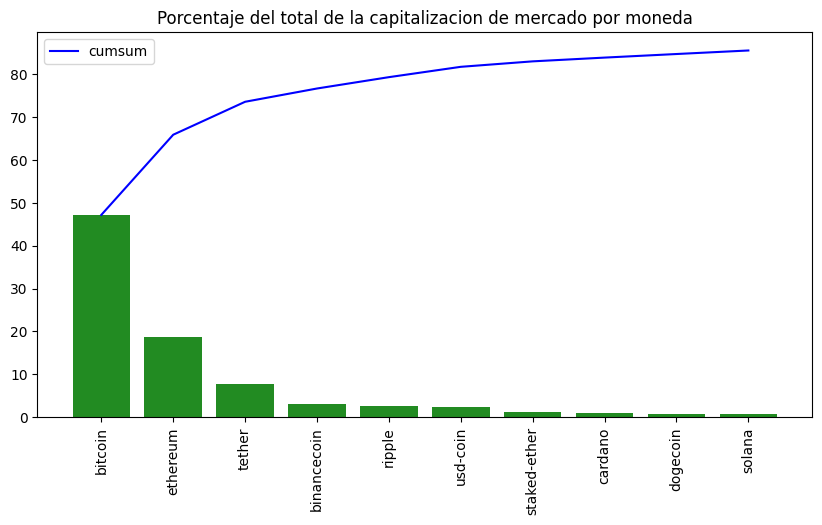

In [124]:
plt.figure(figsize=[10,5])
plt.title('Porcentaje del total de la capitalizacion de mercado por moneda')
plt.plot(coin_markets['id'], coin_markets['cumsum_Percentage_MC'], color= 'b', label= 'cumsum')
plt.xticks(rotation=90)



plt.bar(coin_markets['id'], coin_markets['percentage_of_total'], color= 'forestgreen')

plt.ylabel = ('% Market Cap')
plt.legend()
plt.show()



In [151]:
merge_layer_1.fillna(value=0, inplace=True)
merge_layer_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1228 entries, 2538 to 3765
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                1228 non-null   object 
 1   Price_bitcoin                       1228 non-null   float64
 2   Normalized_Price_bitcoin            1228 non-null   float64
 3   market_caps_bitcoin                 1228 non-null   float64
 4   market_caps_normalized_bitcoin      1228 non-null   float64
 5   n_coins_bitcoin                     1228 non-null   float64
 6   total_volumes_bitcoin               1228 non-null   float64
 7   Volume_normalized_bitcoin           1228 non-null   float64
 8   Price_ethereum                      1228 non-null   float64
 9   Normalized_Price_ethereum           1228 non-null   float64
 10  market_caps_ethereum                1228 non-null   float64
 11  market_caps_normalized_ethereum     1228 non-

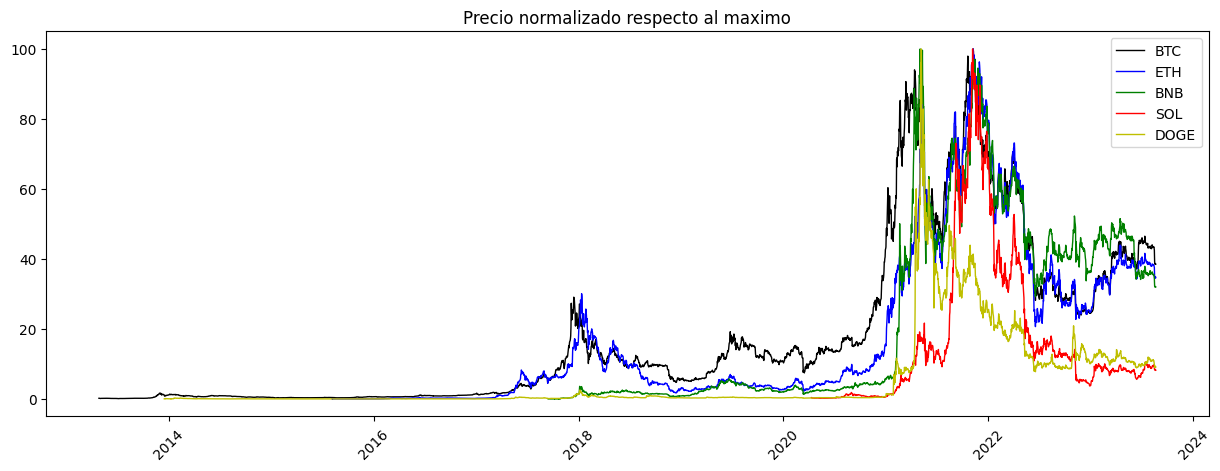

In [24]:
merge_layer_1['Date'] = pd.to_datetime(merge_layer_1['Date']) 
plt.figure(figsize=[15,5])
dates = merge_layer_1['Date']

plt.title('Precio normalizado respecto al maximo')
plt.plot(dates, merge_layer_1['Normalized_Price_bitcoin'], label= 'BTC', linewidth=1, color= 'k')
plt.plot(dates, merge_layer_1['Normalized_Price_ethereum'], label='ETH', linewidth=1, color= 'b')
plt.plot(dates, merge_layer_1['Normalized_Price_binancecoin'], label= 'BNB', linewidth=1, color= 'g')
plt.plot(dates, merge_layer_1['Normalized_Price_solana'], label= 'SOL', linewidth=1, color= 'r')
plt.plot(dates, merge_layer_1['Normalized_Price_dogecoin'], label= 'DOGE', linewidth=1, color= 'y')
plt.xticks(rotation=45)
plt.legend()

#fig, axs=plt.subplots(1,5,figsize=(10,10))
#axs[0,1].plot

En el grafico siguiente se da una conclusion a cerca de la variacion de precio

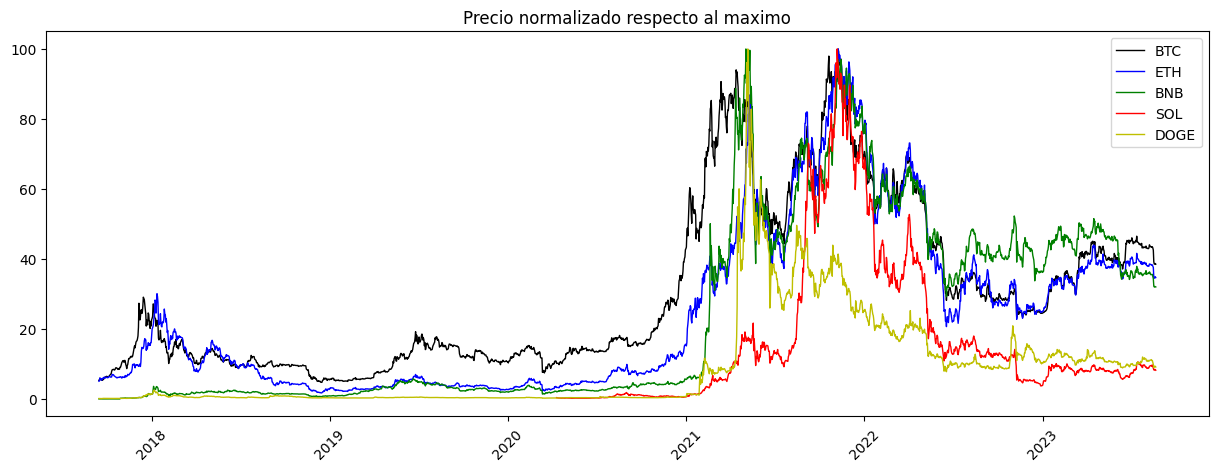

In [22]:
merge_layer_2 = merge_layer_1.loc[(merge_layer_1['Normalized_Price_bitcoin'] > 0) &
                  (merge_layer_1['Normalized_Price_ethereum'] > 0) &
                     (merge_layer_1['Normalized_Price_binancecoin'] > 0) &
                      #(merge_layer_1['Normalized_Price_solana'] > 0) & 
                         (merge_layer_1['Normalized_Price_dogecoin']> 0)]
plt.figure(figsize=[15,5])
dates2 = merge_layer_2['Date']

plt.title('Precio normalizado respecto al maximo')
plt.plot(dates2, merge_layer_2['Normalized_Price_bitcoin'], label= 'BTC', linewidth=1, color= 'k')
plt.plot(dates2, merge_layer_2['Normalized_Price_ethereum'], label='ETH', linewidth=1, color= 'b')
plt.plot(dates2, merge_layer_2['Normalized_Price_binancecoin'], label= 'BNB', linewidth=1, color= 'g')
plt.plot(dates2, merge_layer_2['Normalized_Price_solana'], label= 'SOL', linewidth=1, color= 'r')
plt.plot(dates2, merge_layer_2['Normalized_Price_dogecoin'], label= 'DOGE', linewidth=1, color= 'y')
plt.xticks(rotation=45)
plt.legend()

Puede verse como para Bitcoin, Ethereum, BNB y Doge, hay dos picos de altos precios. uno de ellos es aproximadamente a principios de abril y otro en noviembre del 2021.
En el primero la subida de Bitcoin y Ethereum es similar y se producen casi en simultaneo. Mientras que BinanceCoin y Doge suben mas tarde. El máximo se da para todas aproximadamente en simultáneo. Solana no se ve tan "contagiada" por esta suba. 
En el segundo pico que se da bastante en simultaneo para BTC, ETH, BNB y SOL, no se da para DOGE. 
Luego de este segundo pico, se ve una caida generalizada de todas, solo que al principio pareciera que salen mas fortalecida BNB. Hay que esperar hasta mayo del 2023 para poder ver como BTC pasa BNB. 
La relacion entre BTC y ETH es alta. Sobre todo a partir del segundo pico a fines de abril del 2021.
A partir de enero de 2023 puede verse un mayor crecimiento de BTC y ETH respecto a las otras monedas.

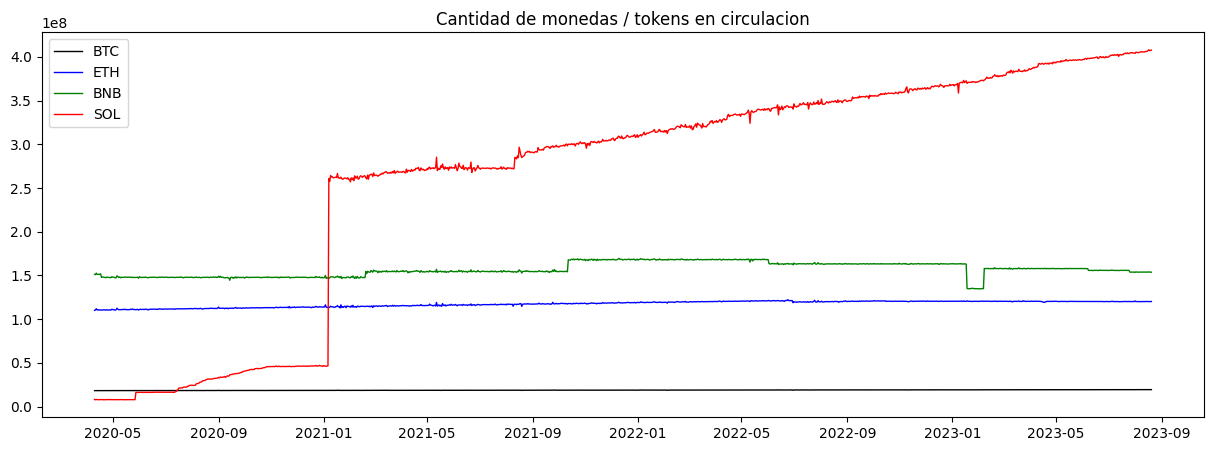

In [154]:
plt.figure(figsize=[15,5])


plt.title('Cantidad de monedas / tokens en circulacion')

plt.plot(dates, merge_layer_1['n_coins_bitcoin'], label= 'BTC', linewidth=1, color= 'k')
plt.plot(dates, merge_layer_1['n_coins_ethereum'], label='ETH', linewidth=1, color= 'b')
plt.plot(dates, merge_layer_1['n_coins_binancecoin'], label= 'BNB', linewidth=1, color= 'g')
plt.plot(dates, merge_layer_1['n_coins_solana'], label= 'SOL', linewidth=1, color= 'r')
#plt.plot(dates, merge_layer_1['n_coins_dogecoin'], label= 'DOGE', linewidth=1, color= 'y')
#plt.xticks(rotation=45)
plt.legend()



#plt.legend()

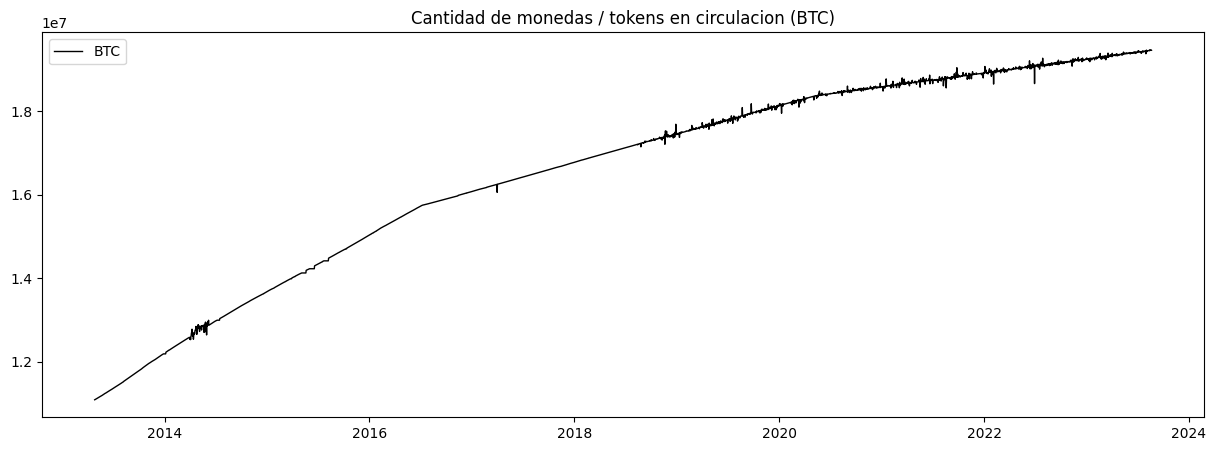

In [26]:
plt.figure(figsize=[15,5])



plt.title('Cantidad de monedas / tokens en circulacion (BTC)')

plt.plot(dates, merge_layer_1['n_coins_bitcoin'], label= 'BTC', linewidth=1, color= 'k')
#plt.plot(dates, merge_layer_1['n_coins_ethereum'], label='ETH', linewidth=1, color= 'b')
#plt.plot(dates, merge_layer_1['n_coins_binancecoin'], label= 'BNB', linewidth=1, color= 'g')
#plt.plot(dates, merge_layer_1['n_coins_solana'], label= 'SOL', linewidth=1, color= 'r')
#plt.plot(dates, merge_layer_1['n_coins_dogecoin'], label= 'DOGE', linewidth=1, color= 'y')
#plt.xticks(rotation=45)
plt.legend()


#plt.title('Cantidad de monedas / tokens en circulacion')

#plt.plot(dates, merge_layer_1['n_coins_bitcoin'], label= 'BTC', linewidth=1, color= 'k')
#plt.plot(dates, merge_layer_1['n_coins_dogecoin'], label= 'DOGE', linewidth=1, color= 'y')

#plt.xticks(rotation=45)
plt.legend()

En el grafico anterior, puede verse la variacion de la pendiente en la cantidad de monedas debido al Halving en Julio de 2016 y en marzo abril del 2020.

In [33]:
l1price= layer_1[['Normalized_Price_bitcoin', 'Normalized_Price_ethereum', 'Normalized_Price_binancecoin', 'Normalized_Price_solana', 'Normalized_Price_dogecoin']]


In [34]:
l1price.dropna(inplace=True)
l1price

C:\Users\Nahuel Elias\AppData\Local\Temp\ipykernel_27620\3377614898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l1price.dropna(inplace=True)


,Normalized_Price_bitcoin,Normalized_Price_ethereum,Normalized_Price_binancecoin,Normalized_Price_solana,Normalized_Price_dogecoin
2538,10.152318,3.276013,2.032121,0.369390,0.286771
2539,10.173151,3.288219,2.048108,0.302697,0.292523
2540,10.223993,3.299349,2.113041,0.337909,0.289742
2541,10.141735,3.254438,2.228647,0.303469,0.287391
2542,10.145639,3.286957,2.308213,0.257165,0.288449
...,...,...,...,...,...
3760,43.140754,37.942085,35.047792,9.209876,10.386303
3761,42.412338,37.579621,34.567749,8.870908,9.872154
3762,42.412338,37.579621,34.567749,8.870908,9.905090
3763,42.412338,37.320980,34.567749,8.870908,9.872154


c:\Users\Nahuel Elias\Documents\Hernry\PI2\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Matriz de graficos de dispersión precios normalizados')

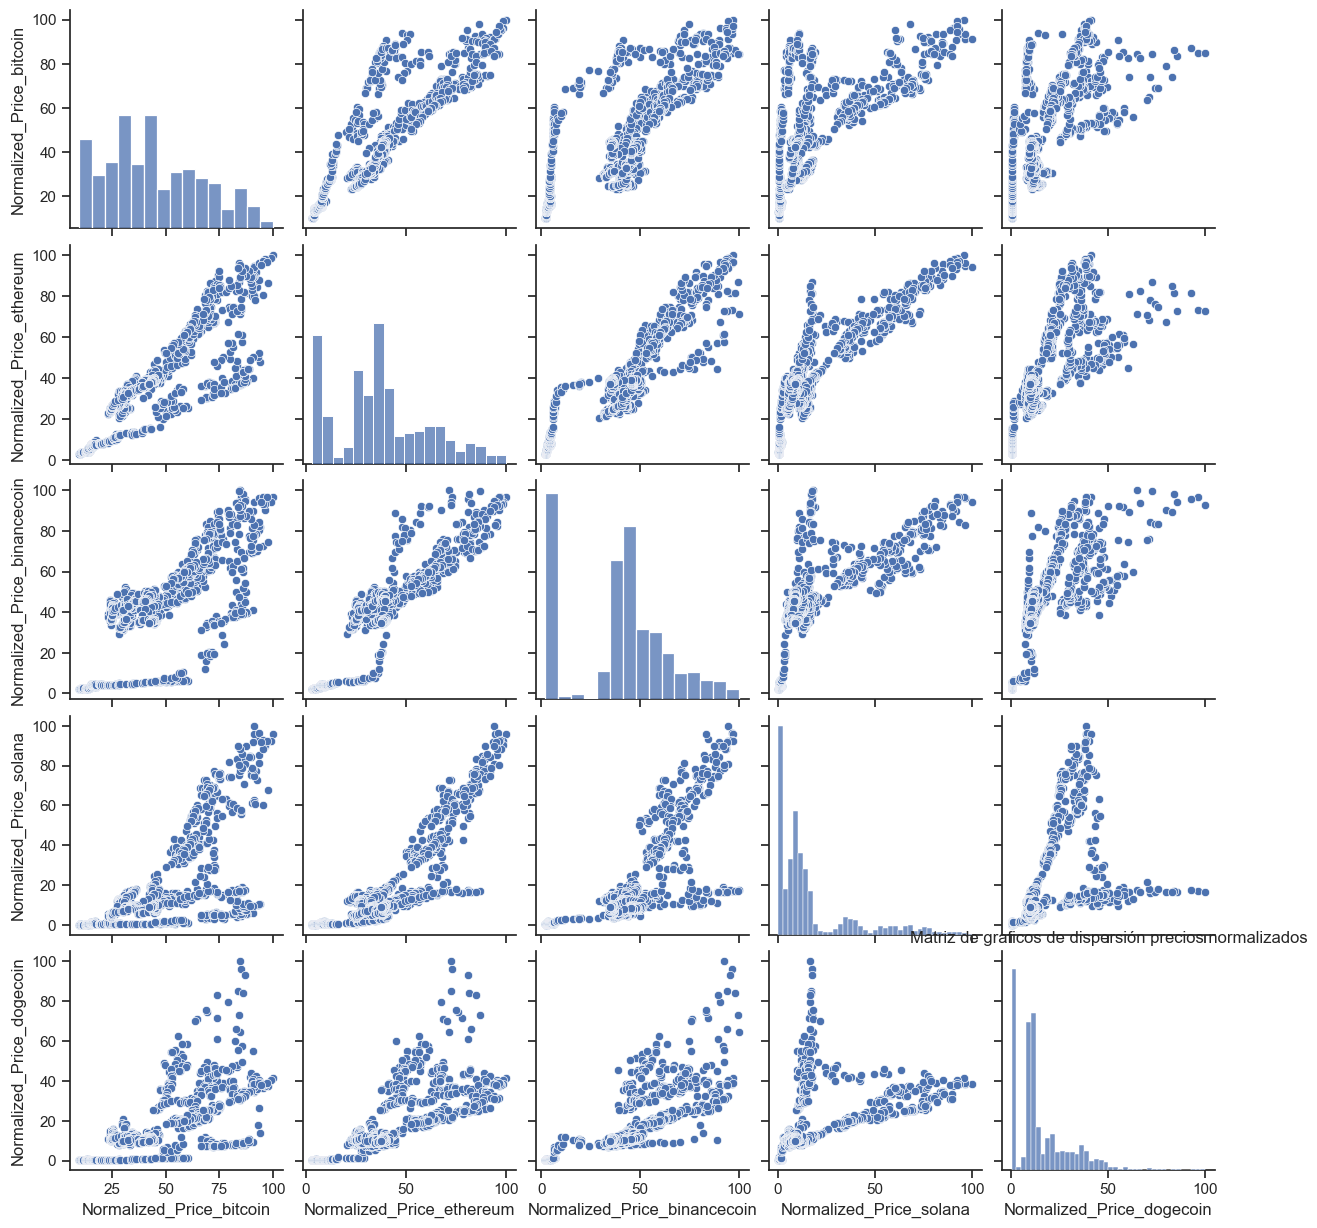

In [35]:
sns.set_theme(style='ticks')
sns.pairplot(l1price)
plt.title("Matriz de graficos de dispersión precios normalizados")

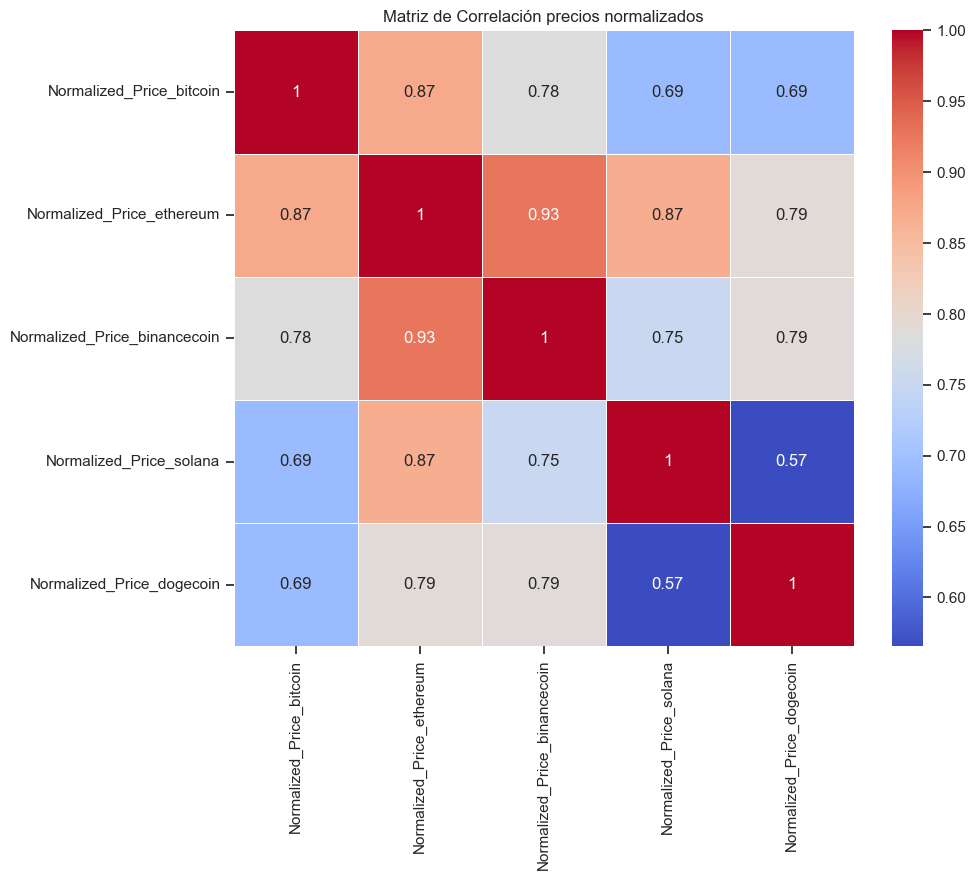

In [36]:
l1price = l1price.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(l1price, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación precios normalizados")
plt.show()

#### **Conclusion 4**

Las monedas DogeCoin y Solana tienen menor correlacion respecto a las otras tres que se mueven de manera parecida.


In [37]:
l1vol = layer_1[['total_volumes_bitcoin', 'total_volumes_ethereum', 'total_volumes_binancecoin', 'total_volumes_solana', 'total_volumes_dogecoin']]
l1vol2 = layer_1[['Volume_normalized_bitcoin', 'Volume_normalized_ethereum', 'Volume_normalized_binancecoin', 'Volume_normalized_solana', 'Volume_normalized_dogecoin' ]]
l1vol.dropna(inplace=True)
l1vol2.dropna(inplace=True)


C:\Users\Nahuel Elias\AppData\Local\Temp\ipykernel_27620\1000362941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l1vol.dropna(inplace=True)
C:\Users\Nahuel Elias\AppData\Local\Temp\ipykernel_27620\1000362941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l1vol2.dropna(inplace=True)


c:\Users\Nahuel Elias\Documents\Hernry\PI2\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Matriz de dispersion de volumenes operados')

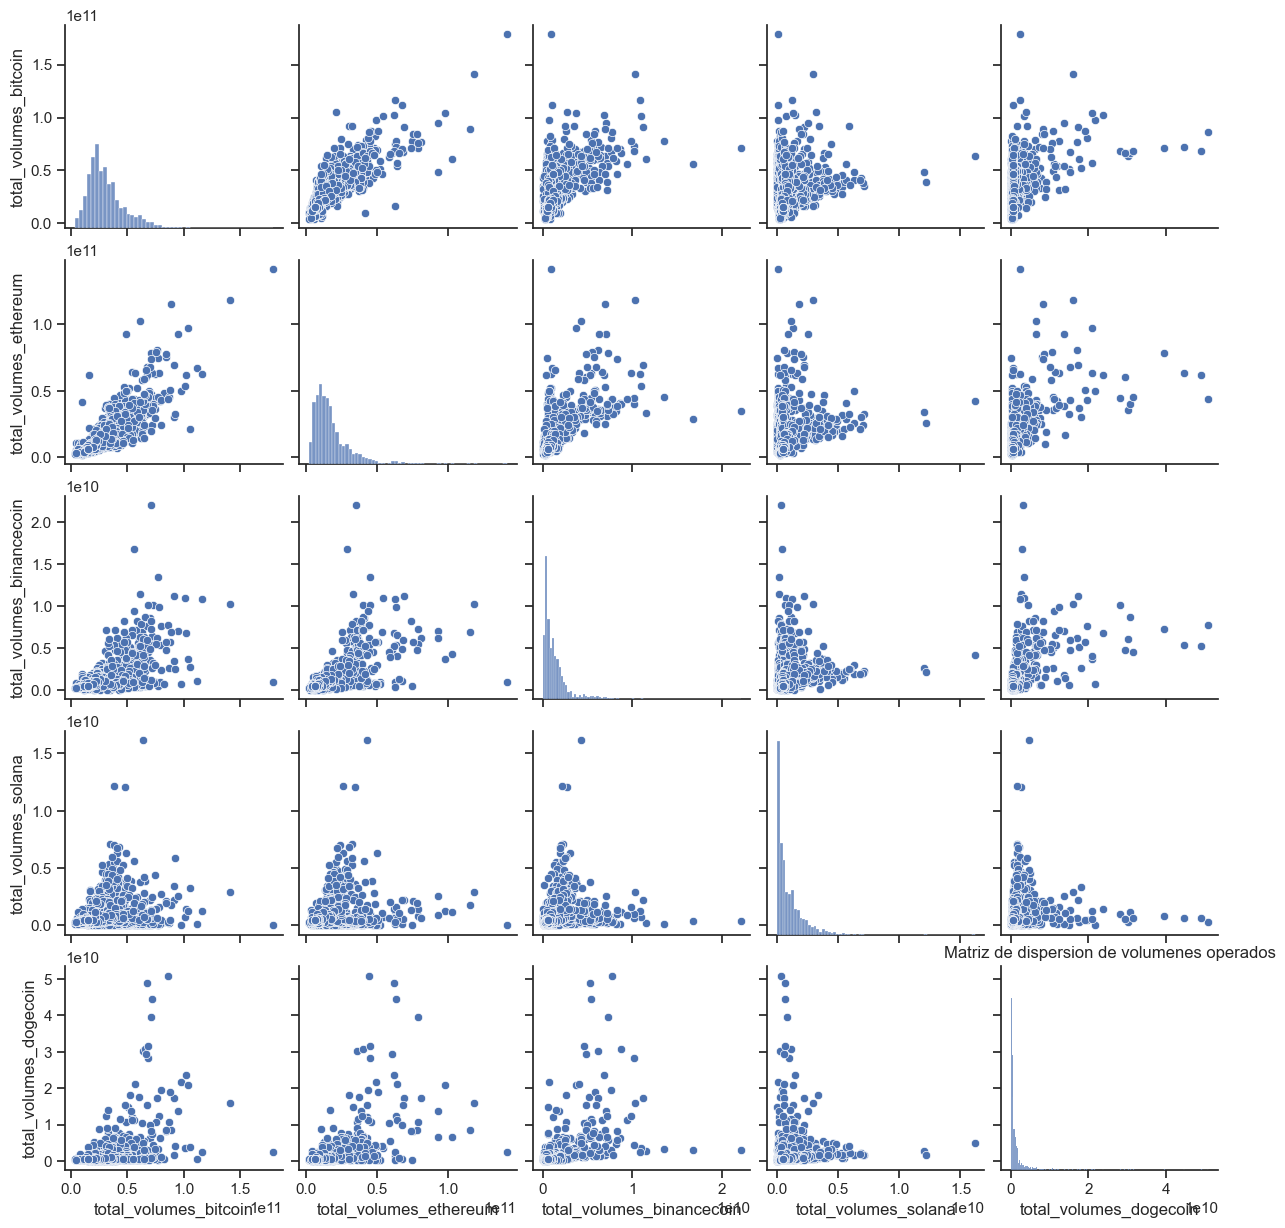

In [38]:

sns.set_theme(style='ticks')
sns.pairplot(l1vol)
plt.title("Matriz de dispersion de volumenes operados")

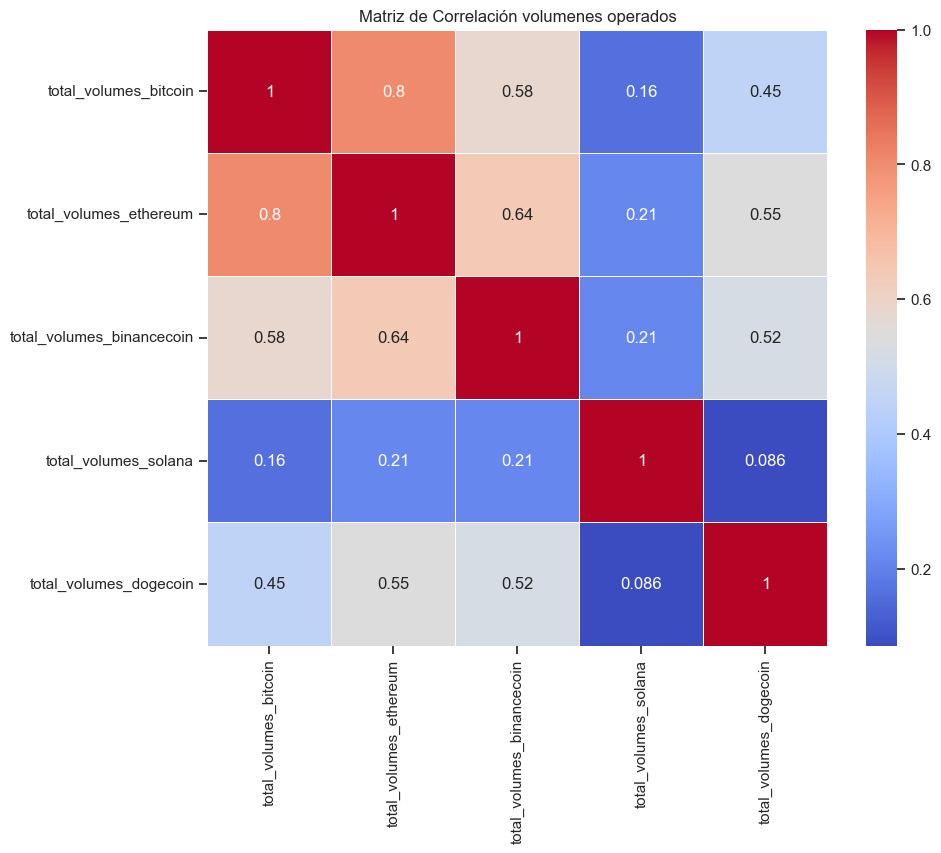

In [39]:
l1vol = l1vol.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(l1vol, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación volumenes operados")
plt.show()

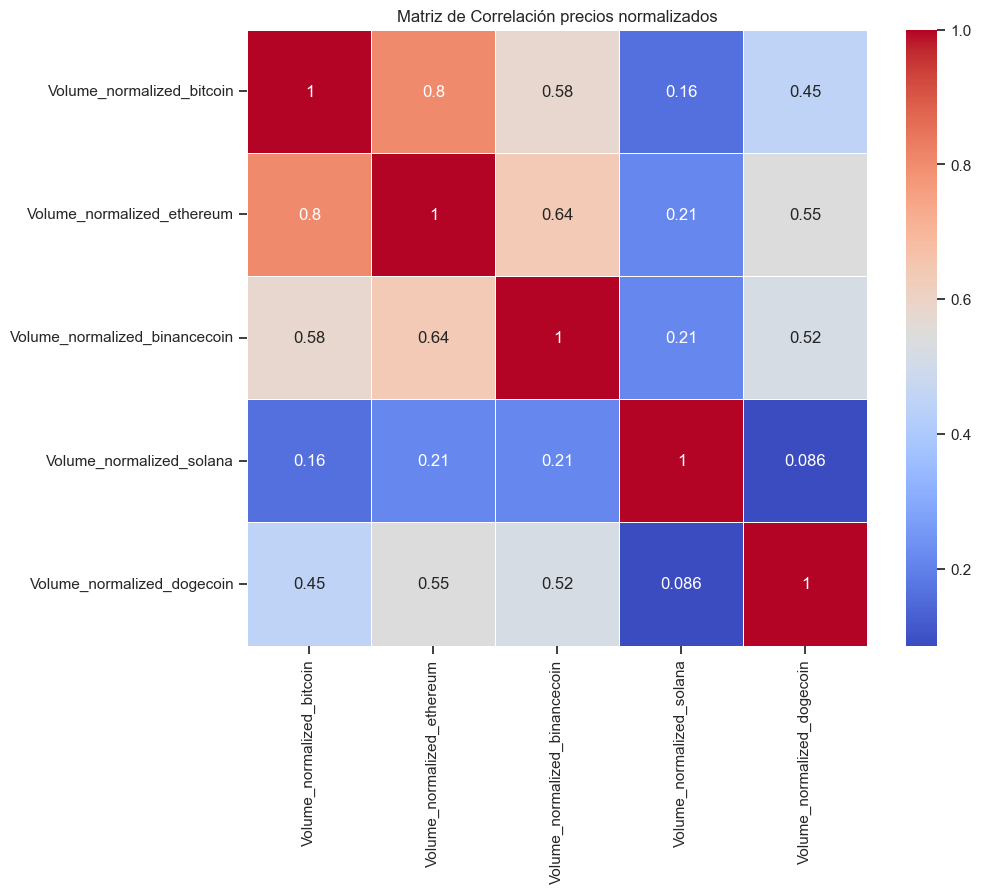

In [40]:
l1vol2 = l1vol2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(l1vol2, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación precios normalizados")
plt.show()

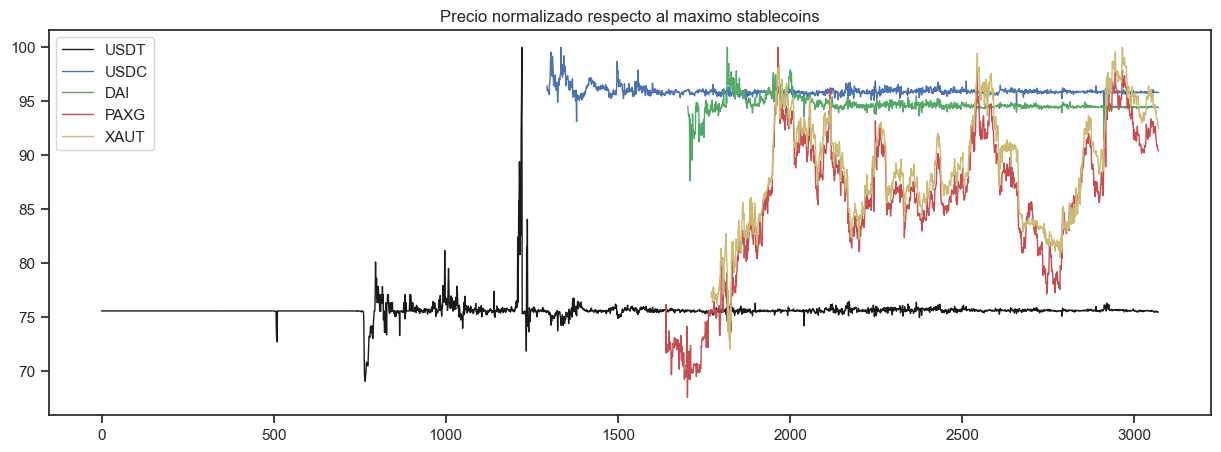

In [41]:
plt.figure(figsize=[15,5])


plt.title('Precio normalizado respecto al maximo stablecoins')
plt.plot(stablecoins['Normalized_Price_tether'], label= 'USDT', linewidth=1, color= 'k')
plt.plot(stablecoins['Normalized_Price_usd-coin'], label='USDC', linewidth=1, color= 'b')
plt.plot(stablecoins['Normalized_Price_dai'], label= 'DAI', linewidth=1, color= 'g')
plt.plot(stablecoins['Normalized_Price_pax-gold'], label= 'PAXG', linewidth=1, color= 'r')
plt.plot(stablecoins['Normalized_Price_tether-gold'], label= 'XAUT', linewidth=1, color= 'y')
plt.legend()

#### Conclusion5:

Se observa mayor variacion en las monedas USDT, USDC, y DAI al comienzo de vida de cada moneda.
Ademas se ve inestabilidad respecto al dolar de las monedas PAXG y XAUT, como era de esperarse ya que estan respaldadas en ORO.


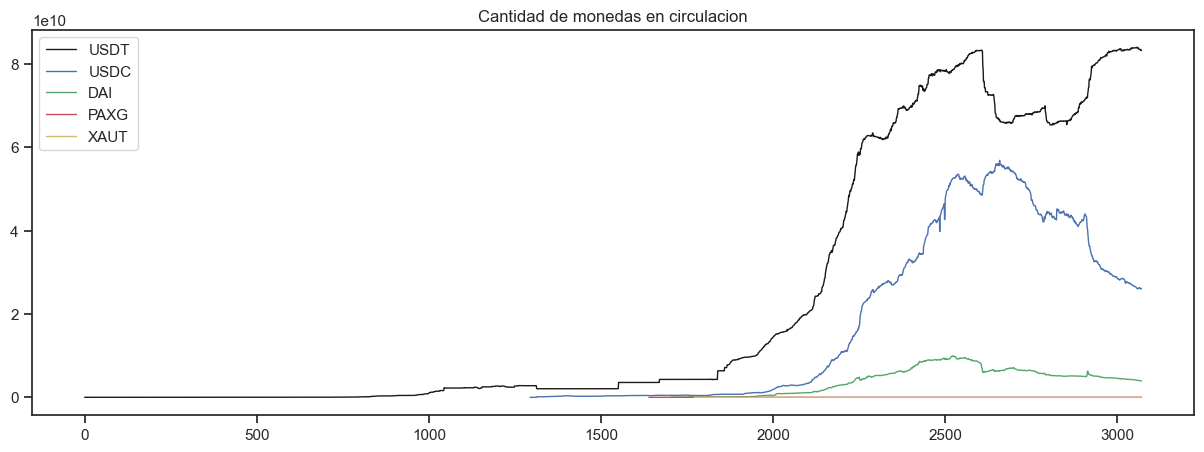

In [42]:
plt.figure(figsize=[15,5])


plt.title('Cantidad de monedas en circulacion')
plt.plot(stablecoins['n_coins_tether'], label= 'USDT', linewidth=1, color= 'k')
plt.plot(stablecoins['n_coins_usd-coin'], label='USDC', linewidth=1, color= 'b')
plt.plot(stablecoins['n_coins_dai'], label= 'DAI', linewidth=1, color= 'g')
plt.plot(stablecoins['n_coins_pax-gold'], label= 'PAXG', linewidth=1, color= 'r')
plt.plot(stablecoins['n_coins_tether-gold'], label= 'XAUT', linewidth=1, color= 'y')
plt.legend()

#### Conclusion 6: 
Este grafico muestra la variacion de monedas en circulacion de las monedas respaldadas en dolar. Esta variacion es menor en DAI (por sus fundamentos como se comento antes), y es casi nula en las monedas respaldadas en oro.



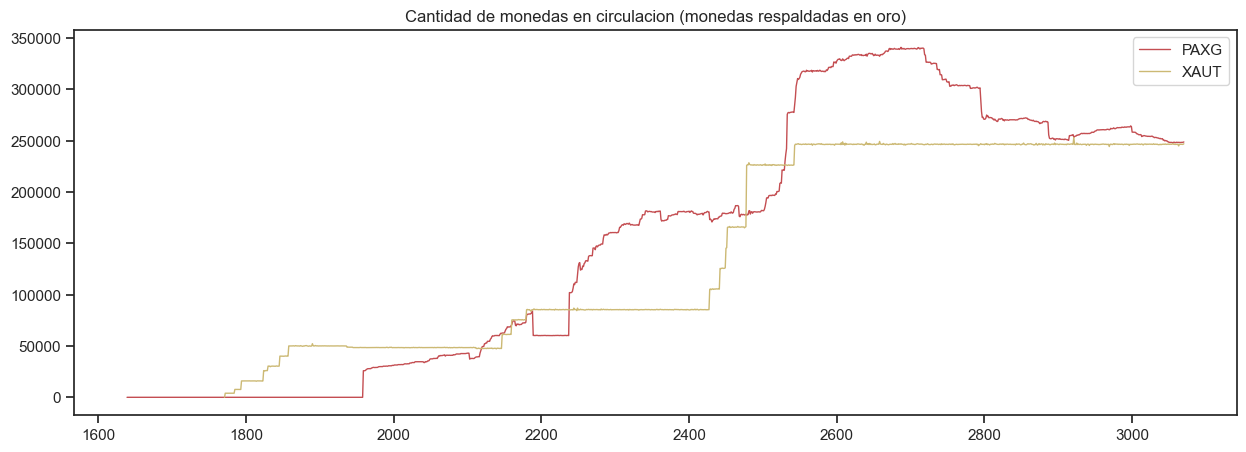

In [43]:
plt.figure(figsize=[15,5])


plt.title('Cantidad de monedas en circulacion (monedas respaldadas en oro)')
#plt.plot(stablecoins['n_coins_tether'], label= 'USDT', linewidth=1, color= 'k')
#plt.plot(stablecoins['n_coins_usd-coin'], label='USDC', linewidth=1, color= 'b')
#plt.plot(stablecoins['n_coins_dai'], label= 'DAI', linewidth=1, color= 'g')
plt.plot(stablecoins['n_coins_pax-gold'], label= 'PAXG', linewidth=1, color= 'r')
plt.plot(stablecoins['n_coins_tether-gold'], label= 'XAUT', linewidth=1, color= 'y')
plt.legend()

#### **Conclusion7**:

Puede verse la variacion en escalon de la moneda XAUT a diferencia de la monenda PAXG. A que se debe esta variacion podria estudiarse en un futuro.

In [44]:
stablecoins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                3071 non-null   object 
 1   Price_tether                        3071 non-null   float64
 2   Normalized_Price_tether             3071 non-null   float64
 3   market_caps_tether                  3071 non-null   float64
 4   market_caps_normalized_tether       3071 non-null   float64
 5   n_coins_tether                      3071 non-null   float64
 6   total_volumes_tether                3071 non-null   float64
 7   Volume_normalized_tether            3071 non-null   float64
 8   Price_usd-coin                      1777 non-null   float64
 9   Normalized_Price_usd-coin           1777 non-null   float64
 10  market_caps_usd-coin                1777 non-null   float64
 11  market_caps_normalized_usd-coin     1777 no

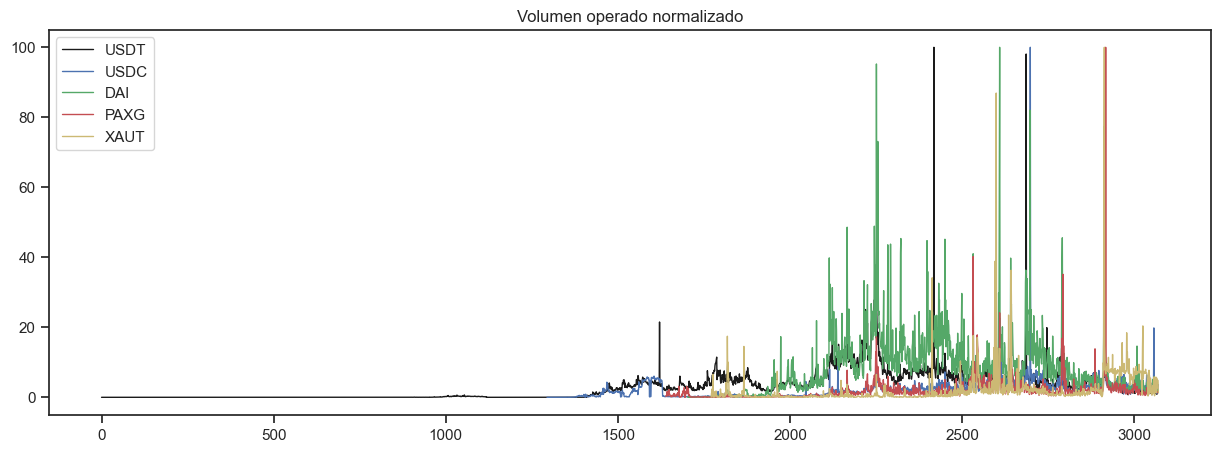

In [45]:
plt.figure(figsize=[15,5])


plt.title('Volumen operado normalizado')
plt.plot(stablecoins['Volume_normalized_tether'], label= 'USDT', linewidth=1, color= 'k')
plt.plot(stablecoins['Volume_normalized_usd-coin'], label='USDC', linewidth=1, color= 'b')
plt.plot(stablecoins['Volume_normalized_dai'], label= 'DAI', linewidth=1, color= 'g')
plt.plot(stablecoins['Volume_normalized_pax-gold'], label= 'PAXG', linewidth=1, color= 'r')
plt.plot(stablecoins['Volume_normalized_tether-gold'], label= 'XAUT', linewidth=1, color= 'y')
plt.legend()

In [46]:
layer_1_ohlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  982 non-null    object 
 1   Open_bitcoin                          982 non-null    float64
 2   High_bitcoin                          982 non-null    float64
 3   Low_bitcoin                           982 non-null    float64
 4   Close_bitcoin                         982 non-null    float64
 5   O_C_variation_Normalized_bitcoin      982 non-null    float64
 6   Max_Variation_Normalized_bitcoin      982 non-null    float64
 7   Open_ethereum                         766 non-null    float64
 8   High_ethereum                         766 non-null    float64
 9   Low_ethereum                          766 non-null    float64
 10  Close_ethereum                        766 non-null    float64
 11  O_C_variation_Norma

In [47]:
layer_1_ohlc

,Date,Open_bitcoin,High_bitcoin,Low_bitcoin,Close_bitcoin,O_C_variation_Normalized_bitcoin,Max_Variation_Normalized_bitcoin,Open_ethereum,High_ethereum,Low_ethereum,...,Low_solana,Close_solana,O_C_variation_Normalized_solana,Max_Variation_Normalized_solana,Open_dogecoin,High_dogecoin,Low_dogecoin,Close_dogecoin,O_C_variation_Normalized_dogecoin,Max_Variation_Normalized_dogecoin
0,04-29-2013,135.30,141.96,135.30,135.30,0.000000,4.922395,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05-02-2013,117.00,117.00,91.01,91.01,22.213675,22.213675,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05-06-2013,111.25,118.33,106.40,106.40,4.359551,10.723596,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05-10-2013,112.64,118.78,112.64,113.01,-0.328480,5.450994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05-14-2013,114.71,117.18,114.16,114.16,0.479470,2.632726,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,08-02-2023,29233.00,29537.00,29147.00,29147.00,0.294188,1.334109,1857.28,1869.75,1838.01,...,23.13,23.13,2.651515,3.367003,0.077873,0.077873,0.074167,0.074167,4.759031,4.759031
978,08-06-2023,29176.00,29176.00,29044.00,29044.00,0.452427,0.452427,1835.70,1835.70,1826.71,...,22.63,23.16,-2.251656,2.339956,0.073642,0.075603,0.073471,0.074149,-0.688466,2.895087
979,08-10-2023,29178.00,29780.00,29178.00,29424.00,-0.843101,2.063198,1826.93,1856.84,1826.93,...,23.05,24.62,-6.811280,6.811280,0.073374,0.075759,0.073374,0.075759,-3.250470,3.250470
980,08-14-2023,29397.00,29412.00,29285.00,29401.00,-0.013607,0.432017,1847.54,1848.51,1839.51,...,24.22,25.15,-2.318959,3.783564,0.075714,0.076696,0.074764,0.074764,1.254722,2.551708


En el siguiente grafico se ve la maxima variacion diaria dividido la media del precio en la ventana de tiempo dada (en este caso la aplicacion da una granuladidad de 4 dias)


$$
Max Variation Normalized = \frac{max-min}{open}*100
$$




Donde:
$$
\text{max: maximo precio del intervalo de tiempo (4 dias)}
$$

$$
\text{open: precio apertura del intervalo (4 dias)}
$$

(array([ 9., 51., 93., 62., 68., 66., 59., 51., 47., 43., 38., 30., 30.,
        23., 21., 28., 14., 13., 12.,  5.,  8., 12., 11.,  9.,  8.,  5.,
         7.,  6., 10.,  4.,  4.,  5.,  7.,  5.,  2.,  5.,  3.,  1.,  1.,
         1.,  1.,  4.,  0.,  3.,  2.,  2.,  2.,  0.,  1.,  1.]),
 array([ 0.        ,  0.69874613,  1.39749226,  2.09623838,  2.79498451,
         3.49373064,  4.19247677,  4.8912229 ,  5.58996902,  6.28871515,
         6.98746128,  7.68620741,  8.38495354,  9.08369966,  9.78244579,
        10.48119192, 11.17993805, 11.87868418, 12.5774303 , 13.27617643,
        13.97492256, 14.67366869, 15.37241482, 16.07116094, 16.76990707,
        17.4686532 , 18.16739933, 18.86614546, 19.56489158, 20.26363771,
        20.96238384, 21.66112997, 22.3598761 , 23.05862222, 23.75736835,
        24.45611448, 25.15486061, 25.85360674, 26.55235286, 27.25109899,
        27.94984512, 28.64859125, 29.34733738, 30.0460835 , 30.74482963,
        31.44357576, 32.14232189, 32.84106802, 33.53981414,

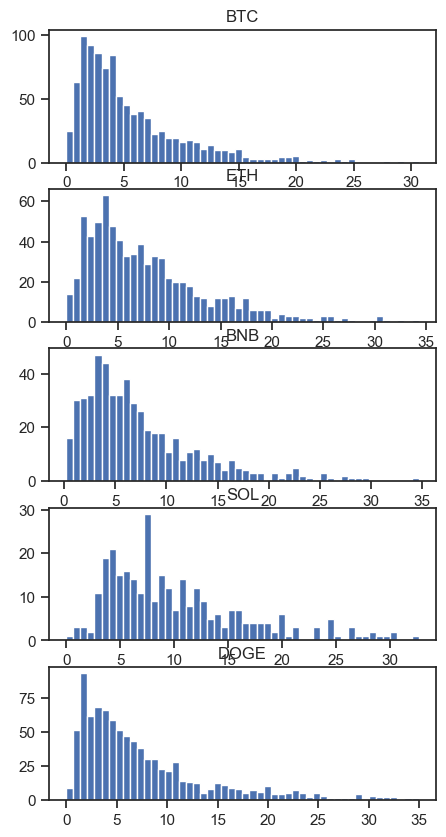

In [48]:
label='bitcooin'
tope=35
bins=50
fig, axs = plt.subplots(5,1, figsize=(5,10))
#plt.hist(df['price'], bins=100)
axs[0].set_title('BTC')
axs[0].hist(layer_1_ohlc['Max_Variation_Normalized_bitcoin'].loc[layer_1_ohlc['Max_Variation_Normalized_bitcoin']<tope] , bins=bins, color='b')
axs[1].set_title('ETH')
axs[1].hist(layer_1_ohlc['Max_Variation_Normalized_ethereum'].loc[layer_1_ohlc['Max_Variation_Normalized_ethereum']<tope], bins=bins)
axs[2].set_title('BNB')
axs[2].hist(layer_1_ohlc['Max_Variation_Normalized_binancecoin'].loc[layer_1_ohlc['Max_Variation_Normalized_binancecoin']<tope], bins=bins)
axs[3].set_title('SOL')
axs[3].hist(layer_1_ohlc['Max_Variation_Normalized_solana'].loc[layer_1_ohlc['Max_Variation_Normalized_solana']<tope], bins=bins)
axs[4].set_title('DOGE')
axs[4].hist(layer_1_ohlc['Max_Variation_Normalized_dogecoin'].loc[layer_1_ohlc['Max_Variation_Normalized_dogecoin']<tope], bins=bins)



In [49]:
layer_1_ohlc_variation = layer_1_ohlc[['Max_Variation_Normalized_bitcoin', 'Max_Variation_Normalized_ethereum', 'Max_Variation_Normalized_binancecoin', 'Max_Variation_Normalized_solana', 'Max_Variation_Normalized_dogecoin']]
layer_1_ohlc_variation.describe()




,Max_Variation_Normalized_bitcoin,Max_Variation_Normalized_ethereum,Max_Variation_Normalized_binancecoin,Max_Variation_Normalized_solana,Max_Variation_Normalized_dogecoin
count,982.000000,766.000000,564.000000,320.000000,922.000000
mean,5.790852,8.440976,13.778190,11.451522,9.836197
std,5.508751,7.798748,113.150074,9.120804,21.777556
min,0.006173,0.000000,0.230017,0.000000,0.000000
25%,2.184547,3.535525,3.456561,5.517715,2.936836
50%,4.120882,6.422824,6.047696,8.749136,5.652362
75%,7.432417,10.913396,10.545934,14.285714,10.495319
max,58.927476,89.589905,2681.235305,57.177652,536.658805


#### **Conclusion 8:**
De este conjunto de monedas con "precio variable", la que tiene menor variacion de precio en el intervalo de tiempo dado de 4 dias, es bitcoin, seguida por ethereum.

In [86]:
oro=pd.read_csv('GLD_US.csv')
oro = oro[['especie','fecha', 'apertura', 'maximo', 'minimo']]
#tetherperday
#dicc = dict(zip(lista_col, lista_col_camb))

#tkr, date, price, 
oro

,especie,fecha,apertura,maximo,minimo
0,GLD_US,2004-11-18,44.43,44.490,44.070
1,GLD_US,2004-11-19,44.49,44.920,44.470
2,GLD_US,2004-11-22,44.75,44.970,44.740
3,GLD_US,2004-11-23,44.88,44.920,44.720
4,GLD_US,2004-11-24,44.93,45.050,44.790
...,...,...,...,...,...
4715,GLD_US,2023-08-10,178.22,178.700,177.540
4716,GLD_US,2023-08-11,177.70,178.360,177.490
4717,GLD_US,2023-08-14,176.86,177.580,176.579
4718,GLD_US,2023-08-15,176.75,177.430,176.330
